### Emily Kim
### Final Project

### Combining + Cleaning Data

In [1]:
import numpy as np
import pandas as pd

# using two datasets
df_2 = pd.read_csv("spam.csv")
df_3 = pd.read_csv("spam_or_not_spam.csv")

In [2]:
# ham = not-spam, spam = spam
df_2.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# 0 = not-spam, 1 = spam
df_3.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
df_2.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
df_3.columns

Index(['email', 'label'], dtype='object')

In [6]:
df_2.shape

(5572, 2)

In [7]:
df_3.shape

(3000, 2)

In [8]:
# change df_2 column name and values to 0 and 1 to match df_3
df_2["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
# change df_2 column name and values of category to 0 and 1 to match df_3
df_2["Category"] = df_2["Category"].replace('ham', '0')
df_2["Category"] = df_2["Category"].replace('spam', '1')

df_2.rename(columns = {"Category" : "label"}, inplace = True)
df_2.rename(columns = {"Message" : "email"}, inplace = True)

In [10]:
df_3 = df_3[['label', 'email']] # switch around label and email to align the columns

In [11]:
df_2.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df_3.head()

,label,email
0,0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1,0,martin a posted tassos papadopoulos the greek ...
2,0,man threatens explosion in moscow thursday aug...
3,0,klez the virus that won t die already the most...
4,0,in adding cream to spaghetti carbonara which ...


In [13]:
# combine vertically
df_combined = pd.concat([df_2, df_3], ignore_index=True)

In [14]:
df_combined.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df_combined.shape

# (5572, 2) = df_2
# (3000, 2) = df_3
# combined = (8572, 2)

(8572, 2)

In [16]:
# drop any duplicates
df_combined = df_combined.drop_duplicates()

In [17]:
df_combined.shape

(8030, 2)

In [18]:
count = 0

unique_emails = df_combined["email"].unique()

for i in unique_emails:
    count = count + 1
    
print(count)

# unique emails is the same as shape, so no duplicate emails with the same spam

8030


In [19]:
df_combined.isnull().sum()

label    0
email    1
dtype: int64

In [20]:
# drop NULL value
df_combined = df_combined.dropna(subset=['email'])

In [21]:
df_combined.shape

(8029, 2)

In [22]:
print(df_combined.isnull().sum())

label    0
email    0
dtype: int64


In [23]:
# created a combined and clean dataset that will be used
df_combined.to_csv("combined_data_clean.csv", index = False)

### EDA + Preprocessing

In [24]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string
from nltk.tokenize import word_tokenize

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [25]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [26]:
# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

! pip install langdetect
from langdetect import detect

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [27]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
df = pd.read_csv("combined_data_clean.csv")

# displaying the initial and last 5 rows
display(df.head(), df.tail())

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


,label,email
8024,1,abc s good morning america ranks it the NUMBE...
8025,1,hyperlink hyperlink hyperlink let mortgage le...
8026,1,thank you for shopping with us gifts for all ...
8027,1,the famous ebay marketing e course learn to s...
8028,1,hello this is chinese traditional 子 件 NUMBER世...


In [29]:
# check the ratio of spam vs non spam emails that's in the dataset
df['label'].value_counts()

label
0    6961
1    1068
Name: count, dtype: int64

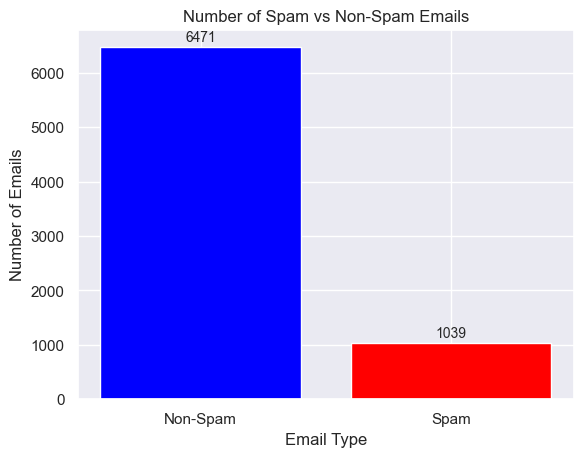

In [52]:
# visual on the spam vs non-spam of the dataset
spam_counts = df['label'].value_counts()

# bar plot
plt.bar(spam_counts.index, spam_counts.values, color=['blue', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam vs Non-Spam Emails')

for i, count in enumerate(spam_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks([0, 1], ['Non-Spam', 'Spam'])  
plt.show()

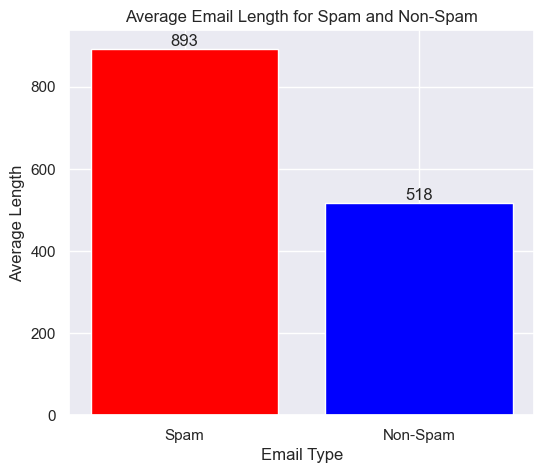

In [55]:
import matplotlib.pyplot as plt

# Calculate the average length for spam and non-spam emails
spam_length = int(df[df['label'] == 1]['email'].apply(len).mean())
not_spam_length = int(df[df['label'] == 0]['email'].apply(len).mean())

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(['Spam', 'Non-Spam'], [spam_length, not_spam_length], color=['red', 'blue'])

# Annotate each bar with its corresponding average length
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.title('Average Email Length for Spam and Non-Spam')

# Show the plot
plt.show()


In [32]:
# looking into the email column to see the actual contents
# thelast row 8028, there are chinese characters so some of these emails aren't in english
email_column = df['email']

# set the max_colwidth option to None to display the entire content
pd.set_option('display.max_colwidth', None)

# display the entire 'email' column
print(email_column)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [33]:
# function to detect language
df['email'] = df['email'].astype(str)  

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'N/A' 

df['language'] = df['email'].apply(detect_language)
non_english_rows = df[df['language'] != 'en']
non_english_labels = non_english_rows['label']

non_english_rows_count = df[df['language'] != 'en'].shape[0]
print("Number of non-english emails in this dataset:", non_english_rows_count)

Number of non-english emails in this dataset: 519


In [34]:
print("Spam/Non-spam ratio for non-english emails:")
print(non_english_labels.value_counts())

Spam/Non-spam ratio for non-english emails:
label
0    490
1     29
Name: count, dtype: int64


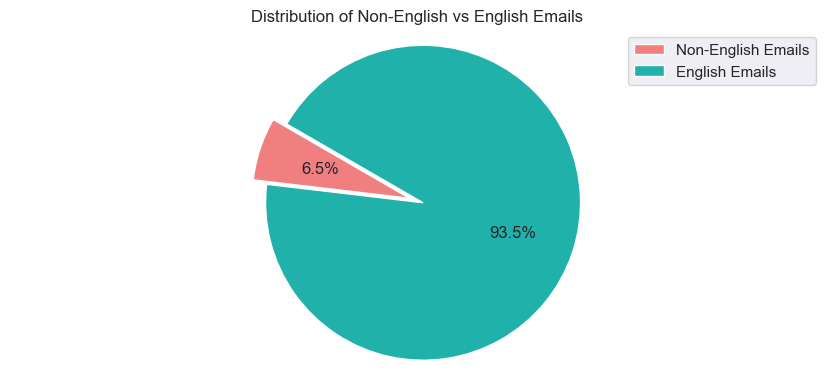

In [35]:
english_rows_count = df[df['language'] == 'en'].shape[0]

# plotting chart
sizes = [non_english_rows_count, english_rows_count]
colors = ['#F08080','#20B2AA']
explode = (0.09, 0) 

plt.figure(figsize=(10.5, 4.5))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Non-English vs English Emails')
plt.axis('equal')
plt.legend(loc="upper right", labels=['Non-English Emails', 'English Emails'])

plt.show()

#### Because there are non-English words in the dataset, I can do one of two things. I can translate each words using the goslate library or I can simply drop the non-English words. The issue with translation is, sometimes it is not as accurate as I would want it to be. It can be mistakenly recognized as spam if it is translated weirdly. Because only 6.4% of this dataset are not in English, I am going to simply drop the non-English words from this dataset.

## Preprocessing Data
Preparing the data in the set for modeling.
1. lowercase the text so that it is the same throughout
2. breaking down the words in the emails
3. removing common words 

In [36]:
# want to just have english text
# drop any non-english text
df_en = df[df['language'] == 'en']
df_en = df_en.drop(columns=['language'])
df_en.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


In [37]:
df_en.shape

(7510, 2)

In [38]:
# create function that preprocesses the data
def preprocess_text(text):
    # handles 1. lowering text to keep it constant
    text = text.lower()
    
    # handles 2. breaking down the words in the emails
    tokens = word_tokenize(text)
    
    # handle 3. removing common words(stop words)
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    
    return filtered_tokens

# adding new column to .csv dataset with processed data
df_en['processed_email'] = df_en['email'].apply(preprocess_text)

print(df_en['processed_email'].head())

0                                                            [go, jurong, point, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, got, amore, wat, ...]
2    [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, std, txt, rate, c, 's, apply, 08452810075over18, 's]
3                                                                                                                      [u, dun, say, early, hor, ..., u, c, already, say, ...]
4                                                                                                                          [nah, n't, think, goes, usf, lives, around, though]
5                                                         [freemsg, hey, darling, 's, 3, week, 's, word, back, 'd, like, fun, still, tb, ok, xxx, std, chgs, send, £1.50, rcv]
Name: processed_email, dtype: object


In [39]:
df_en.head()

,label,email,processed_email
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, jurong, point, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, got, amore, wat, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, std, txt, rate, c, 's, apply, 08452810075over18, 's]"
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, ..., u, c, already, say, ...]"
4,0,"Nah I don't think he goes to usf, he lives around here though","[nah, n't, think, goes, usf, lives, around, though]"
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv","[freemsg, hey, darling, 's, 3, week, 's, word, back, 'd, like, fun, still, tb, ok, xxx, std, chgs, send, £1.50, rcv]"


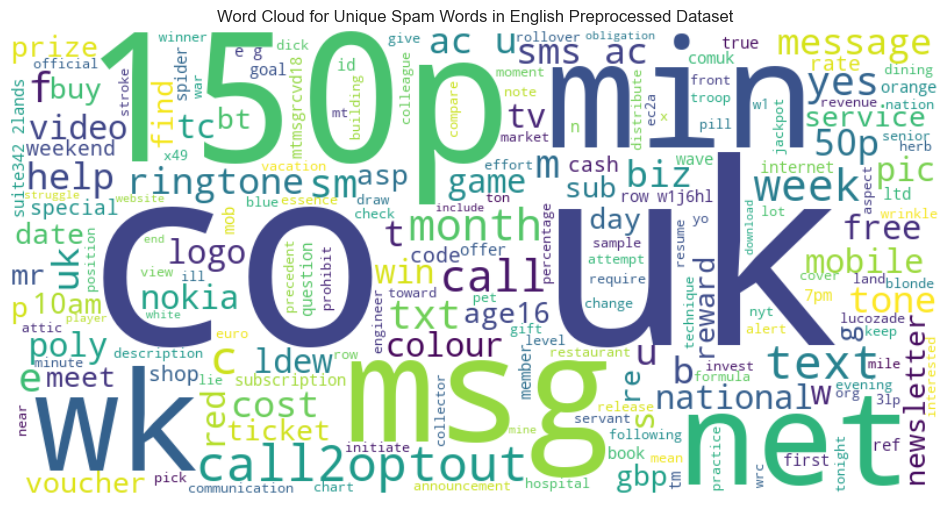

In [40]:
from wordcloud import WordCloud

# Filter the dataset to include only spam emails
spam_df = df_en[df_en['label'] == 1]

# Tokenize the preprocessed text of spam emails and extract unique words
unique_spam_words = set()
for words in spam_df['processed_email']:
    unique_spam_words.update(words)

# Join the unique words into a single string
unique_spam_text = ' '.join(unique_spam_words)

# Generate word cloud for unique spam words with adjusted parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_spam_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unique Spam Words in English Preprocessed Dataset')
plt.show()


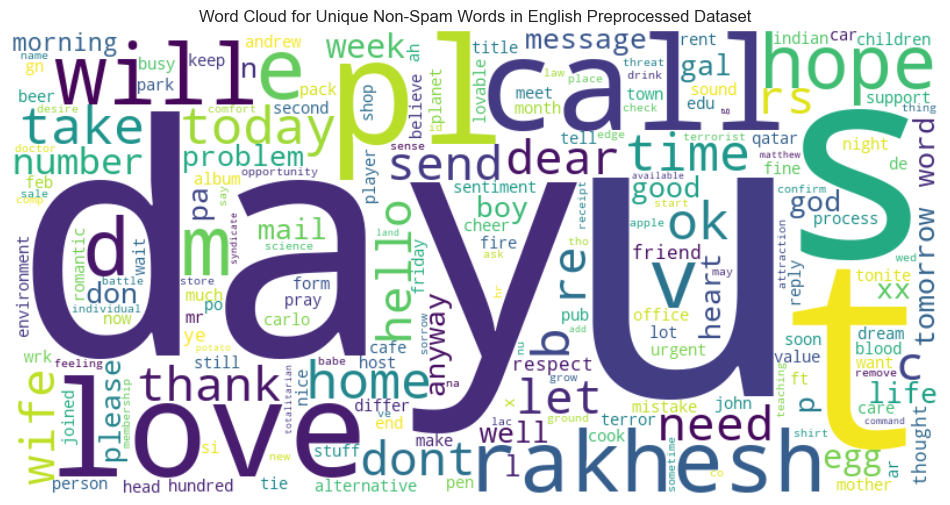

In [41]:
from wordcloud import WordCloud

# Filter the dataset to include only spam emails
spam_df = df_en[df_en['label'] == 0]

# Tokenize the preprocessed text of spam emails and extract unique words
unique_spam_words = set()
for words in spam_df['processed_email']:
    unique_spam_words.update(words)

# Join the unique words into a single string
unique_spam_text = ' '.join(unique_spam_words)

# Generate word cloud for unique spam words with adjusted parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_spam_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unique Non-Spam Words in English Preprocessed Dataset')
plt.show()


In [42]:
# saving dataset to a csv file 
# will now be using this dataset for the rest of the project
df_en.to_csv("preprocessed_english.csv", index = False)

### Build Models and Evaluate

In [43]:
df_en = pd.read_csv("preprocessed_english.csv")

In [44]:
cv = CountVectorizer()

tfid = TfidfVectorizer(max_features=3000)

X = tfid.fit_transform(df_en['processed_email'])

y = df_en['label'].values

# Split the dataset into training and testing sets for both features (X) and labels (y)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 45)

# Initialize Support Vector Classifier (SVC) with a linear kernel
svc = SVC(kernel='linear')

# Initialize Multinomial Naive Bayes Classifier (MNB)
mnb = MultinomialNB()

# Initialize Decision Tree Classifier with a maximum depth of 5
dtc = DecisionTreeClassifier(max_depth=5)

# Initialize Logistic Regression Classifier using 'liblinear' solver and L1 penalty
lrc = LogisticRegression(solver='liblinear', penalty='l1')

# Initialize Random Forest Classifier with 50 estimators and a random state of 2
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

# Initialize Gradient Boosting Classifier with 50 estimators and a random state of 2
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [45]:
# Train each model
svc.fit(X_train, y_train)
mnb.fit(X_train, y_train)
dtc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbdt.fit(X_train, y_train)

# Predict labels for each model
y_pred_svc = svc.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_lrc = lrc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbdt = gbdt.predict(X_test)

# Calculate accuracy and precision scores for each model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)

accuracy_lrc = accuracy_score(y_test, y_pred_lrc)
precision_lrc = precision_score(y_test, y_pred_lrc)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)

accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
precision_gbdt = precision_score(y_test, y_pred_gbdt)

# Print the results
print("Model\t\t\tAccuracy\tPrecision")
print("---------------------------------------------")
print(f"SVC\t\t\t{accuracy_svc:.2f}\t\t{precision_svc:.2f}")
print(f"Multinomial NB\t\t{accuracy_mnb:.2f}\t\t{precision_mnb:.2f}")
print(f"Decision Tree\t\t{accuracy_dtc:.2f}\t\t{precision_dtc:.2f}")
print(f"Logistic Regression\t{accuracy_lrc:.2f}\t\t{precision_lrc:.2f}")
print(f"Random Forest\t\t{accuracy_rfc:.2f}\t\t{precision_rfc:.2f}")
print(f"Gradient Boosting\t{accuracy_gbdt:.2f}\t\t{precision_gbdt:.2f}")


Model			Accuracy	Precision
---------------------------------------------
SVC			0.98		0.97
Multinomial NB		0.97		0.96
Decision Tree		0.94		0.82
Logistic Regression	0.97		0.94
Random Forest		0.98		0.99
Gradient Boosting	0.96		0.98


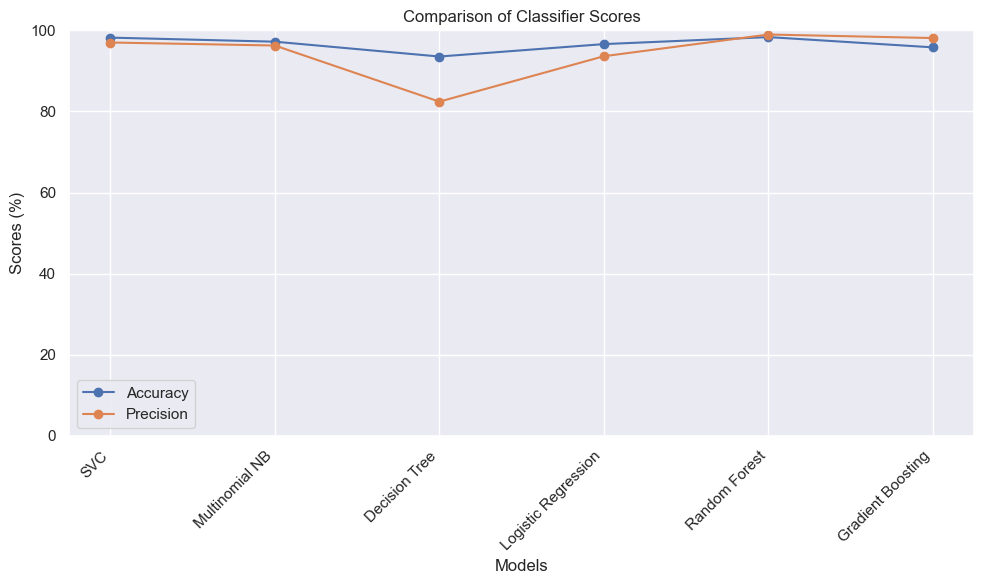

In [46]:
# Define the models and their scores
models = ['SVC', 'Multinomial NB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_svc * 100, accuracy_mnb * 100, accuracy_dtc * 100, accuracy_lrc * 100, accuracy_rfc * 100, accuracy_gbdt * 100]
precision_scores = [precision_svc * 100, precision_mnb * 100, precision_dtc * 100, precision_lrc * 100, precision_rfc * 100, precision_gbdt * 100]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', label='Accuracy')
plt.plot(models, precision_scores, marker='o', label='Precision')

plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.title('Comparison of Classifier Scores')
plt.legend()

plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(True)  # Add gridlines for better visualization

plt.tight_layout()
plt.show()


We can see that from the above that the Random Forest Classifier had the overall best scores for both accuracy and precision.

### Make a Prediction

In [47]:
df = pd.read_csv("preprocessed_english.csv")


In [48]:
# same function from a previous cells but slightly edited to handle the list and
# lower errors (attribute errors)

def preprocess_input(text):
    # Convert text to lowercase
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase
    
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    
    processed_text = ' '.join(tokens)
    
    return processed_text


In [49]:
# vectorizing text data and splitting into train/test sets
cv = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_email'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=45)

# training a RandomForestClassifier to predict labels.
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )  

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [50]:
def predict_spam(sample_text):
    # Assume preprocess_input() is your function to preprocess the input text
    preprocessed_text = preprocess_input(sample_text)
    
    preprocessed_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Assume predict_spam() is your function to predict using your model
    prediction = rfc.predict(preprocessed_vectorized)
    
    if prediction[0] == 1:
        return "This is a SPAM email."
    else:
        return "This is NOT a spam email."

In [51]:
# examples to test out prediction
ex1 = "Congratulations! Click here to get your rEward!"
result1= predict_spam(ex1)
print("example 1:", result1)

ex2 = "When do you want to meet up?"
result2= predict_spam(ex2)
print("example 2:", result2)

ex3 = "new page NUMBER hyperlink hyperlink finally a newsfeed that delivers current and relevant sales marketing advertising articles from such magazines as business..."
result3 = predict_spam(ex3)
print("example 3:", result3)

ex4 = "bees don't care what humans think is impossible"
result4 = predict_spam(ex4)
print("example 4:", result4)

example 1: This is a SPAM email.
example 2: This is NOT a spam email.
example 3: This is a SPAM email.
example 4: This is NOT a spam email.
